# PyTorch: Aprendiendo Fashion-MNIST

## Refs.

* https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

* https://github.com/zalandoresearch/fashion-mnist

* https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb

## **Ejercicio 1)** Importando librerías

**0)** De ser necesario, **instale PyTorch** escribiendo

    !pip3 install torch torchvision torchaudio torchviz

**1)** Importe las librerías estandard de Python: `os`, `datetime`, `collections` y `pickle`.

**2)** Importe las siguientes librerías third party de Python: `matplotlib.pyplot`, `numpy`, `scipy`, `sklearn`, `pandas`, `dill` y `json`.

**3)** Importe las librerias necesarias de **PyTorch**: `torch` y `torchvision`.

**4)** Importe la librería: `google.colab`.

In [75]:
# 1.0)
# !pip3 install torch torchvision torchaudio torchviz

In [10]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict

In [11]:
# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
# import scipy as sp
# import scipy.linalg as linalg
# import sklearn as skl
# import pandas as pd
#import dill
# import json

In [12]:
# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot

In [13]:
# 1.4)
# import google.colab
# from google.colab import files

In [14]:
from tqdm import tqdm

## **Ejercicio 2)**

Bajando y Jugando con el dataset **Fashion-MNIST**.

**1)** Baje y transforme (i.e. normalize los valores al rango [0,1]) los conjuntos de entrenamiento y testeo de FashionMNIST.

**2)** Explore algunos ejemplos de estos conjuntos. Que formato poseen?

**3)** Visitando la página web de FashionMNIST, cree un diccionario de Python `Dict()` asociando cada categoría a un nombre adecuado de la misma.

**4)** Grafique un mosaico de 3x3 imagenes de FashionMNIST, cada una titulada con su respectiva clasificación

In [15]:
# 2.1)
# Se define un transformador para las imágenes,
# que las convierte en tensores y las normaliza.
transform = Compose([
                    ToTensor(),
                    transforms.Normalize((0.5,), (0.5,))
                    ])

# Descarga y carga los conjuntos de datos de entrenamiento y validación.
train_set = datasets.FashionMNIST('MNIST_data/', download=True, train=True, transform=transform)
eval_set = datasets.FashionMNIST('MNIST_data/', download=True, train=False, transform=transform)


In [16]:
# 2.2)
len(train_set), len(eval_set)

(60000, 10000)

In [17]:
train_set[123][1]

2

In [18]:
# 2.3)
map_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [19]:
map_labels[train_set[123][1]]

'Pullover'

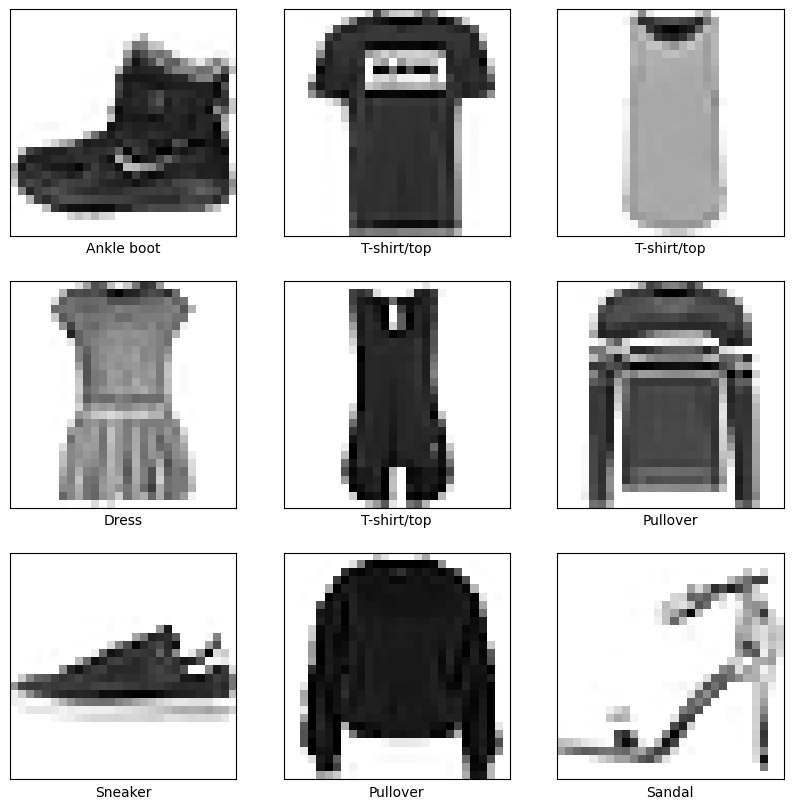

In [20]:
# 2.4)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i][0].squeeze(), cmap=cm.binary)
    plt.xlabel(map_labels[train_set[i][1]])

## Ejercicio 3)

Creando un `DataLoader` para alimentar el modelo con batchs (lotes) de entrenamiento.

**1)** Cree los `DataLoader`s para cada conjunto. Defínalos con un `batch_size` de 100 y con el flag `shuffle` seteado a `True`.

**2)** Use uno de los `DataLoader`s creados anteriormente para explorar algunos elementos del conjunto.

Notar que, el iterador devuelve el batch en un par `(image,label)`.

El objeto `images` es un tensor de dimensiones `(100,1,28,28)`.
El 100 es el tamaño del batch.
El 1 porque hay un solo canal (en este caso, un canal de escala de grises, pero podría haber varios, p. ej. uno por cada color de {Red, Green Blue} en caso que fuesen imagenes a color).
Luego, 28 y 28 porque cada imagen del dataset es de 28 x 28 píxeles.

El objeto `labels` es un tensor de dimensiones `(100,)`.
La $i$-ésima entrada `labels[i]` de `labels` es un número en $\{0,1,...,9\}$ indicando la categoría a la que pertenece la $i$-ésima imagen en el batch, guardada en `images[i]`.

In [21]:
# 3.1)
train_loader = DataLoader(train_set, batch_size=100, shuffle=True)
eval_loader = DataLoader(eval_set, batch_size=100, shuffle=True)

In [22]:
# 3.2)
image, label = next(iter(train_loader))
image.shape, label.shape


(torch.Size([100, 1, 28, 28]), torch.Size([100]))

'Pullover'

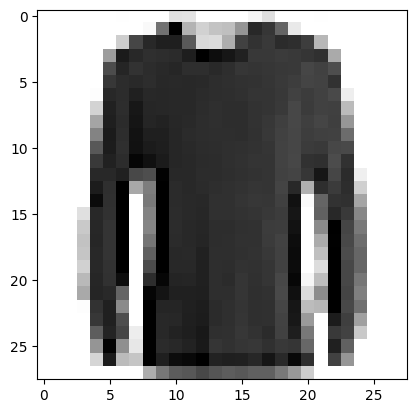

In [36]:
plt.imshow(image[0].squeeze(), cmap=cm.binary)
map_labels[label[0].item()]

## Ejercicio 4)

Defina una red neuronal de 4 capas, una de entrada, dos ocultas de $n_1=128$ y $n_2=64$ neuronas, respectivamente, y una de salida de 10 neuronas.

En las capas intermedias utilice neuronas tipo ReLU y agregueles un *dropout* de p=0.2.
En la capa de salida no utilice funciones de activación ni dropout.

Las capas sucesivas tienen que estar totalmente conectadas entre si.

In [24]:

# 4)
class NeuralNetwork(nn.Module):
    def __init__(self, v1, v2, p=0.2):
        super(NeuralNetwork, self).__init__()

        self.flatten = nn.Flatten() # Capa de entrada
        self.sequence = nn.Sequential(
            nn.Linear(28*28, v1), # Capa oculta 1
            nn.ReLU(), # Función de activación
            nn.Dropout(p), # Dropout
            nn.Linear(v1, v2), # Capa oculta 2
            nn.ReLU(), # Función de activación
            nn.Dropout(p), # Dropout
            nn.Linear(v2, 10), # Capa de salida
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.sequence(x)
        return x

## Ejercicio 5)

Entrenamos el modelo

**1)** Implemente, en una función, un loop de entrenamiento que recorra los batchs (lotes).

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Seleccionamos el dispositivo

True

In [58]:
# 5.1)
def train_loop(model, train_loader, loss_function, optimizer):
    model.train() # Se pone el modelo en modo de entrenamiento
    sum_batch_avg_loss = 0 # Inicializamos la suma de las pérdidas promedio de los batches
    sum_correct = 0 # Inicializamos la suma de las predicciones correctas
    num_processed_examples = 0 # Inicializamos la cantidad de ejemplos procesados

    for batch_number, (images, labels) in enumerate(train_loader):
            
        images = images.to("cuda") # Se envía la imagen al dispositivo
        labels = labels.to("cuda") # Se envía la etiqueta al dispositivo
        batch_size = len(images) # Se obtiene el tamaño del lote

        # Se obtiene la predicción del modelo y se calcula la pérdida 
        pred = model(images)
        loss = loss_function(pred, labels)
        
        # Backpropagation usando el optimizador 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculamos la perdida promedio del batch y lo agregamos a la suma total
        batch_avg_loss = loss.item() 
        sum_batch_avg_loss += batch_avg_loss

        # Calculamos la cantidad de predicciones correctas
        sum_correct += (pred.argmax(1) == labels).sum().item()

        # Calculamos la cantidad total de predicciones procesadas
        num_processed_examples += batch_size

        # Mostramos el progreso del entrenamiento
        if batch_number % 100 == 0:
            print(f"Batch {batch_number}: Loss: {batch_avg_loss:.4f}")

    # Calculamos la perdida promedio de todos los batches
    avg_loss = sum_batch_avg_loss / len(train_loader)
    # Calculamos la precisión del modelo
    accuracy = sum_correct / len(train_loader.dataset)

    return avg_loss, accuracy 



**2)** Implemente, en una función, un loop de validación que recorra los batchs.


In [57]:
def eval_loop(model, valid_loader, loss_function):
    model.eval() # Se pone el modelo en modo de evaluación

    sum_batch_avg_loss = 0 # Inicializamos la suma de las pérdidas promedio de los batches
    sum_correct = 0 # Inicializamos la suma de las predicciones correctas
    num_processed_examples = 0 # Inicializamos la cantidad de ejemplos procesados

    for batch_number, (images, labels) in enumerate(valid_loader):
        images = images.to("cuda") # Se envía la imagen al dispositivo
        labels = labels.to("cuda") # Se envía la etiqueta al dispositivo
        batch_size = len(images)

        # Se obtiene la predicción del modelo y se calcula la pérdida
        pred = model(images)
        loss = loss_function(pred, labels)

        # Calculamos la perdida promedio del batch y lo agregamos a la suma total
        batch_avg_loss = loss.item()
        sum_batch_avg_loss += batch_avg_loss

        # Calculamos la cantidad de predicciones correctas
        sum_correct += (pred.argmax(1) == labels).sum().item()
        
        # Calculamos la cantidad total de predicciones procesadas
        num_processed_examples += batch_size

    # Calculamos la perdida promedio de todos los batches
    avg_loss = sum_batch_avg_loss / len(valid_loader)
    # Calculamos la precisión del modelo
    accuracy = sum_correct / len(valid_loader.dataset)

    return avg_loss, accuracy



**3)** Inicialize dos `DataLoader`s llamados `train_loader` y `valid_loader` a partir del `train_set` (conjunto de entranmiento) y del `valid_set` (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.


In [59]:
train_loader = DataLoader(train_set, batch_size=100, shuffle=True)
eval_loader = DataLoader(eval_set, batch_size=100, shuffle=True)


**4)** Cree una función de pérdida usando la **Cross Entropy Loss**.

**IMPORTANTE:** Notar que la **Cross Entropy Loss** aplica automáticamente una `log_softmax`.



In [60]:
loss_function = nn.CrossEntropyLoss() # Función de pérdida

**6)** Cree una instancia del modelo.

In [61]:
# Creo el modelo
v1 = 128
v2 = 64
model = NeuralNetwork(v1, v2) # Modelo

**5)** Cree un optimizador que utilice el método de **Stochastic Gradient Descent** con un learning rate igual a $10^{-3}$.



In [62]:
# Creo el optimizador
optimizer = optim.SGD(model.parameters(), lr=0.001) # Optimizador
# optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizador

**7)** Especifique en que dispositivo (`device`) va a trabajar: en una **CPU** o en una **GPU**.



In [63]:
model = model.to("cuda") # Enviamos el modelo al dispositivo

**8)** Implemente un loop de entrenamiento y validación que trabaje con el `train_loader` y el `valid_loader`, respectivamente, usando un numero arbitrario de épocas.
Este loop debe guardar en cuatro listas los valores de los promedios del **Cross Entropy Loss** y las fracciones de clasificaciones correctas o **precisión** (accuracy) sobre el conjunto de **entrenamiento** y el de **validación**, respectivamente.

**IMPORTANTE:** No olvide copiar los batchs al dispositivo de trabajo.



**9)** Entrene y valide el modelo.



In [65]:
# Entrenamos el modelo
epochs = 100

training_loss = []
training_accuracy = []
train_loss = []
train_accuracy = []
eval_loss = []
eval_accuracy = []

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1}\n-------------------------------")
    training_avg_loss, training_acc = train_loop(model, train_loader, loss_function, optimizer)
    train_avg_loss, train_acc = eval_loop(model, train_loader, loss_function)
    valid_avg_loss, valid_acc = eval_loop(model, eval_loader, loss_function)

    training_loss.append(training_avg_loss)
    training_accuracy.append(training_acc)
    train_loss.append(train_avg_loss)
    train_accuracy.append(train_acc)
    eval_loss.append(valid_avg_loss)
    eval_accuracy.append(valid_acc)

    print(f"\nTrain Loss: {train_avg_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Valid Loss: {valid_avg_loss:.4f}, Valid Acc: {valid_acc:.4f}")

print("Training complete!")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1
-------------------------------
Batch 0: Loss: 0.8897
Batch 100: Loss: 0.8478
Batch 200: Loss: 0.9646
Batch 300: Loss: 0.8606
Batch 400: Loss: 0.9251
Batch 500: Loss: 0.9025


  1%|          | 1/100 [00:26<44:31, 26.99s/it]


Train Loss: 0.7821, Train Acc: 0.7413
Valid Loss: 0.7955, Valid Acc: 0.7363
Epoch 2
-------------------------------
Batch 0: Loss: 0.8200
Batch 100: Loss: 0.8368
Batch 200: Loss: 0.8865
Batch 300: Loss: 0.9288
Batch 400: Loss: 0.8423
Batch 500: Loss: 0.8907


  2%|▏         | 2/100 [00:53<43:45, 26.79s/it]


Train Loss: 0.7505, Train Acc: 0.7457
Valid Loss: 0.7646, Valid Acc: 0.7411
Epoch 3
-------------------------------
Batch 0: Loss: 0.7448
Batch 100: Loss: 0.8005
Batch 200: Loss: 0.9132
Batch 300: Loss: 0.8695
Batch 400: Loss: 0.8751
Batch 500: Loss: 0.8179


  3%|▎         | 3/100 [01:20<43:21, 26.82s/it]


Train Loss: 0.7242, Train Acc: 0.7494
Valid Loss: 0.7386, Valid Acc: 0.7466
Epoch 4
-------------------------------
Batch 0: Loss: 0.7541
Batch 100: Loss: 0.9023
Batch 200: Loss: 0.9170
Batch 300: Loss: 0.7811
Batch 400: Loss: 0.7413
Batch 500: Loss: 0.9078


  4%|▍         | 4/100 [01:47<42:48, 26.75s/it]


Train Loss: 0.7031, Train Acc: 0.7524
Valid Loss: 0.7180, Valid Acc: 0.7488
Epoch 5
-------------------------------
Batch 0: Loss: 0.9190
Batch 100: Loss: 0.8399
Batch 200: Loss: 0.8118
Batch 300: Loss: 0.7674
Batch 400: Loss: 0.8891
Batch 500: Loss: 0.8120


  5%|▌         | 5/100 [02:14<42:38, 26.93s/it]


Train Loss: 0.6855, Train Acc: 0.7536
Valid Loss: 0.7010, Valid Acc: 0.7479
Epoch 6
-------------------------------
Batch 0: Loss: 0.7063
Batch 100: Loss: 0.8353
Batch 200: Loss: 0.8377
Batch 300: Loss: 0.7935
Batch 400: Loss: 0.9172
Batch 500: Loss: 0.7565


  6%|▌         | 6/100 [02:41<42:16, 26.99s/it]


Train Loss: 0.6699, Train Acc: 0.7588
Valid Loss: 0.6861, Valid Acc: 0.7546
Epoch 7
-------------------------------
Batch 0: Loss: 0.7581
Batch 100: Loss: 0.6925
Batch 200: Loss: 0.7402
Batch 300: Loss: 0.7713
Batch 400: Loss: 0.7152
Batch 500: Loss: 0.8477


  7%|▋         | 7/100 [03:08<41:44, 26.93s/it]


Train Loss: 0.6566, Train Acc: 0.7632
Valid Loss: 0.6725, Valid Acc: 0.7567
Epoch 8
-------------------------------
Batch 0: Loss: 0.7463
Batch 100: Loss: 0.6252
Batch 200: Loss: 0.7155
Batch 300: Loss: 0.7949
Batch 400: Loss: 0.8633
Batch 500: Loss: 0.7423


  8%|▊         | 8/100 [03:34<41:03, 26.78s/it]


Train Loss: 0.6448, Train Acc: 0.7651
Valid Loss: 0.6613, Valid Acc: 0.7578
Epoch 9
-------------------------------
Batch 0: Loss: 0.7748
Batch 100: Loss: 0.6392
Batch 200: Loss: 0.5978
Batch 300: Loss: 0.6045
Batch 400: Loss: 0.7408
Batch 500: Loss: 0.6711


  9%|▉         | 9/100 [04:01<40:25, 26.65s/it]


Train Loss: 0.6335, Train Acc: 0.7690
Valid Loss: 0.6505, Valid Acc: 0.7618
Epoch 10
-------------------------------
Batch 0: Loss: 0.7132
Batch 100: Loss: 0.6624
Batch 200: Loss: 0.8205
Batch 300: Loss: 0.7697
Batch 400: Loss: 0.7509
Batch 500: Loss: 0.6279


 10%|█         | 10/100 [04:27<39:53, 26.59s/it]


Train Loss: 0.6239, Train Acc: 0.7715
Valid Loss: 0.6412, Valid Acc: 0.7640
Epoch 11
-------------------------------
Batch 0: Loss: 0.7359
Batch 100: Loss: 0.6572
Batch 200: Loss: 0.6483
Batch 300: Loss: 0.6977
Batch 400: Loss: 0.8699
Batch 500: Loss: 0.8675


 11%|█         | 11/100 [04:54<39:38, 26.73s/it]


Train Loss: 0.6139, Train Acc: 0.7751
Valid Loss: 0.6314, Valid Acc: 0.7685
Epoch 12
-------------------------------
Batch 0: Loss: 0.5354
Batch 100: Loss: 0.8188
Batch 200: Loss: 0.6608
Batch 300: Loss: 0.6233
Batch 400: Loss: 0.5758
Batch 500: Loss: 0.7859


 12%|█▏        | 12/100 [05:21<39:06, 26.67s/it]


Train Loss: 0.6062, Train Acc: 0.7777
Valid Loss: 0.6242, Valid Acc: 0.7703
Epoch 13
-------------------------------
Batch 0: Loss: 0.6421
Batch 100: Loss: 0.7570
Batch 200: Loss: 0.7614
Batch 300: Loss: 0.6791
Batch 400: Loss: 0.5450
Batch 500: Loss: 0.7095


 13%|█▎        | 13/100 [05:47<38:37, 26.64s/it]


Train Loss: 0.5976, Train Acc: 0.7821
Valid Loss: 0.6163, Valid Acc: 0.7728
Epoch 14
-------------------------------
Batch 0: Loss: 0.6586
Batch 100: Loss: 0.6953
Batch 200: Loss: 0.7580
Batch 300: Loss: 0.7039
Batch 400: Loss: 0.5862
Batch 500: Loss: 0.5582


 14%|█▍        | 14/100 [06:14<38:10, 26.63s/it]


Train Loss: 0.5906, Train Acc: 0.7839
Valid Loss: 0.6093, Valid Acc: 0.7758
Epoch 15
-------------------------------
Batch 0: Loss: 0.6876
Batch 100: Loss: 0.6417
Batch 200: Loss: 0.6654
Batch 300: Loss: 0.8902
Batch 400: Loss: 0.7171
Batch 500: Loss: 0.6182


 15%|█▌        | 15/100 [06:41<37:45, 26.66s/it]


Train Loss: 0.5837, Train Acc: 0.7869
Valid Loss: 0.6028, Valid Acc: 0.7764
Epoch 16
-------------------------------
Batch 0: Loss: 0.6227
Batch 100: Loss: 0.6944
Batch 200: Loss: 0.6799
Batch 300: Loss: 0.5993
Batch 400: Loss: 0.5782
Batch 500: Loss: 0.5393


 16%|█▌        | 16/100 [07:07<37:21, 26.69s/it]


Train Loss: 0.5767, Train Acc: 0.7897
Valid Loss: 0.5962, Valid Acc: 0.7787
Epoch 17
-------------------------------
Batch 0: Loss: 0.7211
Batch 100: Loss: 0.5646
Batch 200: Loss: 0.6340
Batch 300: Loss: 0.7876
Batch 400: Loss: 0.6863
Batch 500: Loss: 0.7146


 17%|█▋        | 17/100 [07:34<36:47, 26.59s/it]


Train Loss: 0.5710, Train Acc: 0.7915
Valid Loss: 0.5910, Valid Acc: 0.7812
Epoch 18
-------------------------------
Batch 0: Loss: 0.7295
Batch 100: Loss: 0.6194
Batch 200: Loss: 0.5710
Batch 300: Loss: 0.5741
Batch 400: Loss: 0.5574
Batch 500: Loss: 0.6983


 18%|█▊        | 18/100 [08:01<36:27, 26.68s/it]


Train Loss: 0.5646, Train Acc: 0.7940
Valid Loss: 0.5848, Valid Acc: 0.7839
Epoch 19
-------------------------------
Batch 0: Loss: 0.6031
Batch 100: Loss: 0.6397
Batch 200: Loss: 0.6282
Batch 300: Loss: 0.5789
Batch 400: Loss: 0.5260
Batch 500: Loss: 0.7338


 19%|█▉        | 19/100 [08:27<36:02, 26.70s/it]


Train Loss: 0.5592, Train Acc: 0.7969
Valid Loss: 0.5798, Valid Acc: 0.7869
Epoch 20
-------------------------------
Batch 0: Loss: 0.7099
Batch 100: Loss: 0.5613
Batch 200: Loss: 0.6137
Batch 300: Loss: 0.5873
Batch 400: Loss: 0.7239
Batch 500: Loss: 0.7790


 20%|██        | 20/100 [08:54<35:44, 26.81s/it]


Train Loss: 0.5540, Train Acc: 0.7981
Valid Loss: 0.5748, Valid Acc: 0.7900
Epoch 21
-------------------------------
Batch 0: Loss: 0.6215
Batch 100: Loss: 0.5795
Batch 200: Loss: 0.6515
Batch 300: Loss: 0.5446
Batch 400: Loss: 0.6517
Batch 500: Loss: 0.6147


 21%|██        | 21/100 [09:22<35:26, 26.91s/it]


Train Loss: 0.5485, Train Acc: 0.8006
Valid Loss: 0.5696, Valid Acc: 0.7912
Epoch 22
-------------------------------
Batch 0: Loss: 0.5555
Batch 100: Loss: 0.6545
Batch 200: Loss: 0.6664
Batch 300: Loss: 0.6471
Batch 400: Loss: 0.5162
Batch 500: Loss: 0.5829


 22%|██▏       | 22/100 [09:48<35:00, 26.93s/it]


Train Loss: 0.5440, Train Acc: 0.8022
Valid Loss: 0.5655, Valid Acc: 0.7924
Epoch 23
-------------------------------
Batch 0: Loss: 0.5143
Batch 100: Loss: 0.5423
Batch 200: Loss: 0.6906
Batch 300: Loss: 0.6555
Batch 400: Loss: 0.5830
Batch 500: Loss: 0.7812


 23%|██▎       | 23/100 [10:16<34:39, 27.00s/it]


Train Loss: 0.5388, Train Acc: 0.8044
Valid Loss: 0.5607, Valid Acc: 0.7952
Epoch 24
-------------------------------
Batch 0: Loss: 0.4582
Batch 100: Loss: 0.5486
Batch 200: Loss: 0.6990
Batch 300: Loss: 0.5829
Batch 400: Loss: 0.6719
Batch 500: Loss: 0.5934


 24%|██▍       | 24/100 [10:42<34:06, 26.92s/it]


Train Loss: 0.5345, Train Acc: 0.8061
Valid Loss: 0.5568, Valid Acc: 0.7967
Epoch 25
-------------------------------
Batch 0: Loss: 0.5627
Batch 100: Loss: 0.6411
Batch 200: Loss: 0.5703
Batch 300: Loss: 0.8036
Batch 400: Loss: 0.5504
Batch 500: Loss: 0.6163


 25%|██▌       | 25/100 [11:10<33:44, 27.00s/it]


Train Loss: 0.5303, Train Acc: 0.8078
Valid Loss: 0.5530, Valid Acc: 0.7985
Epoch 26
-------------------------------
Batch 0: Loss: 0.5182
Batch 100: Loss: 0.5033
Batch 200: Loss: 0.6500
Batch 300: Loss: 0.5693
Batch 400: Loss: 0.8201
Batch 500: Loss: 0.5822


 26%|██▌       | 26/100 [11:36<33:05, 26.84s/it]


Train Loss: 0.5263, Train Acc: 0.8090
Valid Loss: 0.5490, Valid Acc: 0.7987
Epoch 27
-------------------------------
Batch 0: Loss: 0.5711
Batch 100: Loss: 0.4832
Batch 200: Loss: 0.5137
Batch 300: Loss: 0.7304
Batch 400: Loss: 0.4885
Batch 500: Loss: 0.5489


 27%|██▋       | 27/100 [12:03<32:38, 26.83s/it]


Train Loss: 0.5222, Train Acc: 0.8112
Valid Loss: 0.5455, Valid Acc: 0.8016
Epoch 28
-------------------------------
Batch 0: Loss: 0.6131
Batch 100: Loss: 0.5822
Batch 200: Loss: 0.5981
Batch 300: Loss: 0.6068
Batch 400: Loss: 0.4113
Batch 500: Loss: 0.5594


 28%|██▊       | 28/100 [12:29<32:02, 26.70s/it]


Train Loss: 0.5182, Train Acc: 0.8130
Valid Loss: 0.5420, Valid Acc: 0.8021
Epoch 29
-------------------------------
Batch 0: Loss: 0.6706
Batch 100: Loss: 0.5034
Batch 200: Loss: 0.4720
Batch 300: Loss: 0.5432
Batch 400: Loss: 0.5502
Batch 500: Loss: 0.5562


 29%|██▉       | 29/100 [12:56<31:27, 26.59s/it]


Train Loss: 0.5143, Train Acc: 0.8147
Valid Loss: 0.5382, Valid Acc: 0.8035
Epoch 30
-------------------------------
Batch 0: Loss: 0.5969
Batch 100: Loss: 0.5735
Batch 200: Loss: 0.5473
Batch 300: Loss: 0.4746
Batch 400: Loss: 0.5795
Batch 500: Loss: 0.4772


 30%|███       | 30/100 [13:22<30:58, 26.55s/it]


Train Loss: 0.5109, Train Acc: 0.8161
Valid Loss: 0.5351, Valid Acc: 0.8044
Epoch 31
-------------------------------
Batch 0: Loss: 0.6153
Batch 100: Loss: 0.6258
Batch 200: Loss: 0.6044
Batch 300: Loss: 0.7097
Batch 400: Loss: 0.5348
Batch 500: Loss: 0.3733


 31%|███       | 31/100 [13:49<30:34, 26.59s/it]


Train Loss: 0.5074, Train Acc: 0.8170
Valid Loss: 0.5321, Valid Acc: 0.8058
Epoch 32
-------------------------------
Batch 0: Loss: 0.4700
Batch 100: Loss: 0.6791
Batch 200: Loss: 0.6403
Batch 300: Loss: 0.5216
Batch 400: Loss: 0.5314
Batch 500: Loss: 0.5235


 32%|███▏      | 32/100 [14:15<30:10, 26.62s/it]


Train Loss: 0.5044, Train Acc: 0.8177
Valid Loss: 0.5291, Valid Acc: 0.8059
Epoch 33
-------------------------------
Batch 0: Loss: 0.6748
Batch 100: Loss: 0.6549
Batch 200: Loss: 0.5145
Batch 300: Loss: 0.5620
Batch 400: Loss: 0.6666
Batch 500: Loss: 0.5745


 33%|███▎      | 33/100 [14:42<29:50, 26.73s/it]


Train Loss: 0.5011, Train Acc: 0.8189
Valid Loss: 0.5259, Valid Acc: 0.8070
Epoch 34
-------------------------------
Batch 0: Loss: 0.6142
Batch 100: Loss: 0.5077
Batch 200: Loss: 0.5158
Batch 300: Loss: 0.7065
Batch 400: Loss: 0.5563
Batch 500: Loss: 0.7840


 34%|███▍      | 34/100 [15:09<29:29, 26.81s/it]


Train Loss: 0.4979, Train Acc: 0.8205
Valid Loss: 0.5232, Valid Acc: 0.8080
Epoch 35
-------------------------------
Batch 0: Loss: 0.4935
Batch 100: Loss: 0.4931
Batch 200: Loss: 0.6101
Batch 300: Loss: 0.5917
Batch 400: Loss: 0.5993
Batch 500: Loss: 0.7835


 35%|███▌      | 35/100 [15:36<29:07, 26.88s/it]


Train Loss: 0.4949, Train Acc: 0.8211
Valid Loss: 0.5206, Valid Acc: 0.8086
Epoch 36
-------------------------------
Batch 0: Loss: 0.4777
Batch 100: Loss: 0.7898
Batch 200: Loss: 0.5257
Batch 300: Loss: 0.5002
Batch 400: Loss: 0.3700
Batch 500: Loss: 0.6911


 36%|███▌      | 36/100 [16:03<28:37, 26.84s/it]


Train Loss: 0.4923, Train Acc: 0.8225
Valid Loss: 0.5185, Valid Acc: 0.8103
Epoch 37
-------------------------------
Batch 0: Loss: 0.6078
Batch 100: Loss: 0.6373
Batch 200: Loss: 0.5177
Batch 300: Loss: 0.7432
Batch 400: Loss: 0.6457
Batch 500: Loss: 0.5609


 37%|███▋      | 37/100 [16:30<28:12, 26.86s/it]


Train Loss: 0.4894, Train Acc: 0.8229
Valid Loss: 0.5154, Valid Acc: 0.8101
Epoch 38
-------------------------------
Batch 0: Loss: 0.4998
Batch 100: Loss: 0.5984
Batch 200: Loss: 0.4968
Batch 300: Loss: 0.5286
Batch 400: Loss: 0.4833
Batch 500: Loss: 0.5389


 38%|███▊      | 38/100 [16:56<27:35, 26.70s/it]


Train Loss: 0.4864, Train Acc: 0.8244
Valid Loss: 0.5126, Valid Acc: 0.8102
Epoch 39
-------------------------------
Batch 0: Loss: 0.6201
Batch 100: Loss: 0.4684
Batch 200: Loss: 0.4872
Batch 300: Loss: 0.5127
Batch 400: Loss: 0.5274
Batch 500: Loss: 0.3668


 39%|███▉      | 39/100 [17:23<27:13, 26.78s/it]


Train Loss: 0.4839, Train Acc: 0.8254
Valid Loss: 0.5107, Valid Acc: 0.8119
Epoch 40
-------------------------------
Batch 0: Loss: 0.5324
Batch 100: Loss: 0.6351
Batch 200: Loss: 0.5711
Batch 300: Loss: 0.4721
Batch 400: Loss: 0.4860
Batch 500: Loss: 0.6017


 40%|████      | 40/100 [17:50<26:52, 26.87s/it]


Train Loss: 0.4813, Train Acc: 0.8259
Valid Loss: 0.5080, Valid Acc: 0.8120
Epoch 41
-------------------------------
Batch 0: Loss: 0.5562
Batch 100: Loss: 0.5243
Batch 200: Loss: 0.5641
Batch 300: Loss: 0.5763
Batch 400: Loss: 0.5095
Batch 500: Loss: 0.4178


 41%|████      | 41/100 [18:18<26:28, 26.93s/it]


Train Loss: 0.4795, Train Acc: 0.8261
Valid Loss: 0.5063, Valid Acc: 0.8145
Epoch 42
-------------------------------
Batch 0: Loss: 0.5754
Batch 100: Loss: 0.7447
Batch 200: Loss: 0.4572
Batch 300: Loss: 0.5905
Batch 400: Loss: 0.6139
Batch 500: Loss: 0.5930


 42%|████▏     | 42/100 [18:45<26:04, 26.97s/it]


Train Loss: 0.4767, Train Acc: 0.8269
Valid Loss: 0.5039, Valid Acc: 0.8142
Epoch 43
-------------------------------
Batch 0: Loss: 0.6020
Batch 100: Loss: 0.5707
Batch 200: Loss: 0.5202
Batch 300: Loss: 0.4192
Batch 400: Loss: 0.6099
Batch 500: Loss: 0.4789


 43%|████▎     | 43/100 [19:12<25:37, 26.97s/it]


Train Loss: 0.4742, Train Acc: 0.8279
Valid Loss: 0.5018, Valid Acc: 0.8155
Epoch 44
-------------------------------
Batch 0: Loss: 0.4976
Batch 100: Loss: 0.5420
Batch 200: Loss: 0.5451
Batch 300: Loss: 0.4648
Batch 400: Loss: 0.4621
Batch 500: Loss: 0.5121


 44%|████▍     | 44/100 [19:39<25:16, 27.07s/it]


Train Loss: 0.4722, Train Acc: 0.8287
Valid Loss: 0.4998, Valid Acc: 0.8158
Epoch 45
-------------------------------
Batch 0: Loss: 0.6961
Batch 100: Loss: 0.4750
Batch 200: Loss: 0.4080
Batch 300: Loss: 0.4699
Batch 400: Loss: 0.4819
Batch 500: Loss: 0.4851


 45%|████▌     | 45/100 [20:06<24:46, 27.02s/it]


Train Loss: 0.4698, Train Acc: 0.8290
Valid Loss: 0.4977, Valid Acc: 0.8152
Epoch 46
-------------------------------
Batch 0: Loss: 0.6353
Batch 100: Loss: 0.6259
Batch 200: Loss: 0.4971
Batch 300: Loss: 0.4222
Batch 400: Loss: 0.5551
Batch 500: Loss: 0.4524


 46%|████▌     | 46/100 [20:33<24:16, 26.97s/it]


Train Loss: 0.4675, Train Acc: 0.8309
Valid Loss: 0.4957, Valid Acc: 0.8170
Epoch 47
-------------------------------
Batch 0: Loss: 0.6097
Batch 100: Loss: 0.5528
Batch 200: Loss: 0.7029
Batch 300: Loss: 0.4406
Batch 400: Loss: 0.4796
Batch 500: Loss: 0.4156


 47%|████▋     | 47/100 [21:00<23:51, 27.01s/it]


Train Loss: 0.4657, Train Acc: 0.8314
Valid Loss: 0.4941, Valid Acc: 0.8174
Epoch 48
-------------------------------
Batch 0: Loss: 0.6612
Batch 100: Loss: 0.5818
Batch 200: Loss: 0.3353
Batch 300: Loss: 0.3841
Batch 400: Loss: 0.4210
Batch 500: Loss: 0.4029


 48%|████▊     | 48/100 [21:27<23:26, 27.05s/it]


Train Loss: 0.4639, Train Acc: 0.8320
Valid Loss: 0.4922, Valid Acc: 0.8189
Epoch 49
-------------------------------
Batch 0: Loss: 0.6766
Batch 100: Loss: 0.4866
Batch 200: Loss: 0.5196
Batch 300: Loss: 0.4571
Batch 400: Loss: 0.5424
Batch 500: Loss: 0.5755


 49%|████▉     | 49/100 [21:54<22:58, 27.03s/it]


Train Loss: 0.4618, Train Acc: 0.8329
Valid Loss: 0.4907, Valid Acc: 0.8193
Epoch 50
-------------------------------
Batch 0: Loss: 0.4917
Batch 100: Loss: 0.4694
Batch 200: Loss: 0.6861
Batch 300: Loss: 0.6276
Batch 400: Loss: 0.4696
Batch 500: Loss: 0.4681


 50%|█████     | 50/100 [22:21<22:28, 26.97s/it]


Train Loss: 0.4598, Train Acc: 0.8336
Valid Loss: 0.4889, Valid Acc: 0.8186
Epoch 51
-------------------------------
Batch 0: Loss: 0.6795
Batch 100: Loss: 0.5076
Batch 200: Loss: 0.4483
Batch 300: Loss: 0.6902
Batch 400: Loss: 0.4888
Batch 500: Loss: 0.4580


 51%|█████     | 51/100 [22:47<21:53, 26.81s/it]


Train Loss: 0.4581, Train Acc: 0.8342
Valid Loss: 0.4872, Valid Acc: 0.8190
Epoch 52
-------------------------------
Batch 0: Loss: 0.5941
Batch 100: Loss: 0.4400
Batch 200: Loss: 0.3610
Batch 300: Loss: 0.6066
Batch 400: Loss: 0.4751
Batch 500: Loss: 0.4437


 52%|█████▏    | 52/100 [23:14<21:33, 26.95s/it]


Train Loss: 0.4560, Train Acc: 0.8352
Valid Loss: 0.4854, Valid Acc: 0.8197
Epoch 53
-------------------------------
Batch 0: Loss: 0.6170
Batch 100: Loss: 0.4581
Batch 200: Loss: 0.3806
Batch 300: Loss: 0.3988
Batch 400: Loss: 0.5130
Batch 500: Loss: 0.4389


 53%|█████▎    | 53/100 [23:42<21:09, 27.02s/it]


Train Loss: 0.4544, Train Acc: 0.8358
Valid Loss: 0.4841, Valid Acc: 0.8210
Epoch 54
-------------------------------
Batch 0: Loss: 0.4382
Batch 100: Loss: 0.4448
Batch 200: Loss: 0.6733
Batch 300: Loss: 0.4604
Batch 400: Loss: 0.4155
Batch 500: Loss: 0.6007


 54%|█████▍    | 54/100 [24:09<20:45, 27.07s/it]


Train Loss: 0.4525, Train Acc: 0.8362
Valid Loss: 0.4821, Valid Acc: 0.8213
Epoch 55
-------------------------------
Batch 0: Loss: 0.4342
Batch 100: Loss: 0.5220
Batch 200: Loss: 0.4436
Batch 300: Loss: 0.5063
Batch 400: Loss: 0.4009
Batch 500: Loss: 0.4355


 55%|█████▌    | 55/100 [24:36<20:14, 27.00s/it]


Train Loss: 0.4510, Train Acc: 0.8365
Valid Loss: 0.4808, Valid Acc: 0.8233
Epoch 56
-------------------------------
Batch 0: Loss: 0.3919
Batch 100: Loss: 0.3919
Batch 200: Loss: 0.4913
Batch 300: Loss: 0.4898
Batch 400: Loss: 0.4797
Batch 500: Loss: 0.6749


 56%|█████▌    | 56/100 [25:03<19:47, 27.00s/it]


Train Loss: 0.4492, Train Acc: 0.8376
Valid Loss: 0.4793, Valid Acc: 0.8229
Epoch 57
-------------------------------
Batch 0: Loss: 0.4396
Batch 100: Loss: 0.5926
Batch 200: Loss: 0.5025
Batch 300: Loss: 0.4823
Batch 400: Loss: 0.3366
Batch 500: Loss: 0.4967


 57%|█████▋    | 57/100 [25:30<19:24, 27.08s/it]


Train Loss: 0.4477, Train Acc: 0.8379
Valid Loss: 0.4782, Valid Acc: 0.8232
Epoch 58
-------------------------------
Batch 0: Loss: 0.5189
Batch 100: Loss: 0.3480
Batch 200: Loss: 0.5121
Batch 300: Loss: 0.7171
Batch 400: Loss: 0.4943
Batch 500: Loss: 0.3851


 58%|█████▊    | 58/100 [25:57<18:58, 27.10s/it]


Train Loss: 0.4463, Train Acc: 0.8382
Valid Loss: 0.4768, Valid Acc: 0.8231
Epoch 59
-------------------------------
Batch 0: Loss: 0.5077
Batch 100: Loss: 0.6749
Batch 200: Loss: 0.4471
Batch 300: Loss: 0.6187
Batch 400: Loss: 0.4577
Batch 500: Loss: 0.4331


 59%|█████▉    | 59/100 [26:24<18:31, 27.10s/it]


Train Loss: 0.4443, Train Acc: 0.8391
Valid Loss: 0.4750, Valid Acc: 0.8238
Epoch 60
-------------------------------
Batch 0: Loss: 0.5304
Batch 100: Loss: 0.4614
Batch 200: Loss: 0.4616
Batch 300: Loss: 0.4144
Batch 400: Loss: 0.3340
Batch 500: Loss: 0.4511


 60%|██████    | 60/100 [26:51<18:03, 27.08s/it]


Train Loss: 0.4426, Train Acc: 0.8394
Valid Loss: 0.4734, Valid Acc: 0.8232
Epoch 61
-------------------------------
Batch 0: Loss: 0.4760
Batch 100: Loss: 0.5124
Batch 200: Loss: 0.4112
Batch 300: Loss: 0.6616
Batch 400: Loss: 0.4584
Batch 500: Loss: 0.4845


 61%|██████    | 61/100 [27:18<17:30, 26.93s/it]


Train Loss: 0.4413, Train Acc: 0.8397
Valid Loss: 0.4720, Valid Acc: 0.8244
Epoch 62
-------------------------------
Batch 0: Loss: 0.6079
Batch 100: Loss: 0.6811
Batch 200: Loss: 0.4410
Batch 300: Loss: 0.4870
Batch 400: Loss: 0.4978
Batch 500: Loss: 0.5275


 62%|██████▏   | 62/100 [27:45<17:03, 26.95s/it]


Train Loss: 0.4399, Train Acc: 0.8402
Valid Loss: 0.4708, Valid Acc: 0.8255
Epoch 63
-------------------------------
Batch 0: Loss: 0.4737
Batch 100: Loss: 0.4839
Batch 200: Loss: 0.5281
Batch 300: Loss: 0.4617
Batch 400: Loss: 0.5597
Batch 500: Loss: 0.6513


 63%|██████▎   | 63/100 [28:11<16:34, 26.88s/it]


Train Loss: 0.4381, Train Acc: 0.8415
Valid Loss: 0.4696, Valid Acc: 0.8263
Epoch 64
-------------------------------
Batch 0: Loss: 0.5468
Batch 100: Loss: 0.5329
Batch 200: Loss: 0.5617
Batch 300: Loss: 0.5854
Batch 400: Loss: 0.4857
Batch 500: Loss: 0.4525


 64%|██████▍   | 64/100 [28:38<16:05, 26.81s/it]


Train Loss: 0.4367, Train Acc: 0.8419
Valid Loss: 0.4681, Valid Acc: 0.8272
Epoch 65
-------------------------------
Batch 0: Loss: 0.6374
Batch 100: Loss: 0.4877
Batch 200: Loss: 0.4621
Batch 300: Loss: 0.5014
Batch 400: Loss: 0.5923
Batch 500: Loss: 0.6176


 65%|██████▌   | 65/100 [29:05<15:35, 26.74s/it]


Train Loss: 0.4351, Train Acc: 0.8424
Valid Loss: 0.4666, Valid Acc: 0.8266
Epoch 66
-------------------------------
Batch 0: Loss: 0.3760
Batch 100: Loss: 0.4600
Batch 200: Loss: 0.3337
Batch 300: Loss: 0.5427
Batch 400: Loss: 0.4463
Batch 500: Loss: 0.4515


 66%|██████▌   | 66/100 [29:31<15:06, 26.68s/it]


Train Loss: 0.4338, Train Acc: 0.8433
Valid Loss: 0.4657, Valid Acc: 0.8289
Epoch 67
-------------------------------
Batch 0: Loss: 0.5030
Batch 100: Loss: 0.3915
Batch 200: Loss: 0.4635
Batch 300: Loss: 0.4460
Batch 400: Loss: 0.5897
Batch 500: Loss: 0.5185


 67%|██████▋   | 67/100 [29:58<14:46, 26.87s/it]


Train Loss: 0.4323, Train Acc: 0.8437
Valid Loss: 0.4641, Valid Acc: 0.8279
Epoch 68
-------------------------------
Batch 0: Loss: 0.5282
Batch 100: Loss: 0.4164
Batch 200: Loss: 0.4796
Batch 300: Loss: 0.5330
Batch 400: Loss: 0.4624
Batch 500: Loss: 0.5267


 68%|██████▊   | 68/100 [30:26<14:24, 27.00s/it]


Train Loss: 0.4314, Train Acc: 0.8439
Valid Loss: 0.4636, Valid Acc: 0.8283
Epoch 69
-------------------------------
Batch 0: Loss: 0.6010
Batch 100: Loss: 0.5146
Batch 200: Loss: 0.3813
Batch 300: Loss: 0.4471
Batch 400: Loss: 0.6011
Batch 500: Loss: 0.4494


 69%|██████▉   | 69/100 [30:53<13:55, 26.94s/it]


Train Loss: 0.4296, Train Acc: 0.8451
Valid Loss: 0.4619, Valid Acc: 0.8306
Epoch 70
-------------------------------
Batch 0: Loss: 0.3858
Batch 100: Loss: 0.4845
Batch 200: Loss: 0.3384
Batch 300: Loss: 0.3405
Batch 400: Loss: 0.4921
Batch 500: Loss: 0.4282


 70%|███████   | 70/100 [31:19<13:25, 26.83s/it]


Train Loss: 0.4281, Train Acc: 0.8457
Valid Loss: 0.4607, Valid Acc: 0.8301
Epoch 71
-------------------------------
Batch 0: Loss: 0.4496
Batch 100: Loss: 0.4182
Batch 200: Loss: 0.4476
Batch 300: Loss: 0.4499
Batch 400: Loss: 0.2967
Batch 500: Loss: 0.3210


 71%|███████   | 71/100 [31:46<12:56, 26.78s/it]


Train Loss: 0.4269, Train Acc: 0.8460
Valid Loss: 0.4597, Valid Acc: 0.8304
Epoch 72
-------------------------------
Batch 0: Loss: 0.3911
Batch 100: Loss: 0.5629
Batch 200: Loss: 0.4791
Batch 300: Loss: 0.3986
Batch 400: Loss: 0.3890
Batch 500: Loss: 0.5394


 72%|███████▏  | 72/100 [32:13<12:32, 26.87s/it]


Train Loss: 0.4263, Train Acc: 0.8455
Valid Loss: 0.4588, Valid Acc: 0.8305
Epoch 73
-------------------------------
Batch 0: Loss: 0.4553
Batch 100: Loss: 0.3472
Batch 200: Loss: 0.3482
Batch 300: Loss: 0.5146
Batch 400: Loss: 0.5288
Batch 500: Loss: 0.4291


 73%|███████▎  | 73/100 [32:40<12:07, 26.94s/it]


Train Loss: 0.4249, Train Acc: 0.8465
Valid Loss: 0.4580, Valid Acc: 0.8314
Epoch 74
-------------------------------
Batch 0: Loss: 0.6149
Batch 100: Loss: 0.5027
Batch 200: Loss: 0.5114
Batch 300: Loss: 0.5148
Batch 400: Loss: 0.3872
Batch 500: Loss: 0.3620


 74%|███████▍  | 74/100 [33:07<11:41, 26.98s/it]


Train Loss: 0.4233, Train Acc: 0.8472
Valid Loss: 0.4567, Valid Acc: 0.8315
Epoch 75
-------------------------------
Batch 0: Loss: 0.4212
Batch 100: Loss: 0.4990
Batch 200: Loss: 0.5400
Batch 300: Loss: 0.5202
Batch 400: Loss: 0.5414
Batch 500: Loss: 0.5721


 75%|███████▌  | 75/100 [33:34<11:13, 26.94s/it]


Train Loss: 0.4222, Train Acc: 0.8478
Valid Loss: 0.4554, Valid Acc: 0.8318
Epoch 76
-------------------------------
Batch 0: Loss: 0.3718
Batch 100: Loss: 0.5969
Batch 200: Loss: 0.4986
Batch 300: Loss: 0.4356
Batch 400: Loss: 0.4644
Batch 500: Loss: 0.5639


 76%|███████▌  | 76/100 [34:01<10:45, 26.88s/it]


Train Loss: 0.4207, Train Acc: 0.8476
Valid Loss: 0.4541, Valid Acc: 0.8330
Epoch 77
-------------------------------
Batch 0: Loss: 0.4602
Batch 100: Loss: 0.5008
Batch 200: Loss: 0.3568
Batch 300: Loss: 0.4683
Batch 400: Loss: 0.4499
Batch 500: Loss: 0.5162


 77%|███████▋  | 77/100 [34:28<10:19, 26.95s/it]


Train Loss: 0.4196, Train Acc: 0.8486
Valid Loss: 0.4532, Valid Acc: 0.8331
Epoch 78
-------------------------------
Batch 0: Loss: 0.3491
Batch 100: Loss: 0.5085
Batch 200: Loss: 0.4014
Batch 300: Loss: 0.5477
Batch 400: Loss: 0.4562
Batch 500: Loss: 0.3781


 78%|███████▊  | 78/100 [34:55<09:53, 27.00s/it]


Train Loss: 0.4185, Train Acc: 0.8491
Valid Loss: 0.4523, Valid Acc: 0.8334
Epoch 79
-------------------------------
Batch 0: Loss: 0.6296
Batch 100: Loss: 0.3806
Batch 200: Loss: 0.6174
Batch 300: Loss: 0.4517
Batch 400: Loss: 0.4654
Batch 500: Loss: 0.4768


 79%|███████▉  | 79/100 [35:22<09:28, 27.09s/it]


Train Loss: 0.4173, Train Acc: 0.8494
Valid Loss: 0.4513, Valid Acc: 0.8336
Epoch 80
-------------------------------
Batch 0: Loss: 0.3674
Batch 100: Loss: 0.4217
Batch 200: Loss: 0.3860
Batch 300: Loss: 0.3804
Batch 400: Loss: 0.4158
Batch 500: Loss: 0.4664


 80%|████████  | 80/100 [35:49<09:03, 27.15s/it]


Train Loss: 0.4160, Train Acc: 0.8497
Valid Loss: 0.4502, Valid Acc: 0.8339
Epoch 81
-------------------------------
Batch 0: Loss: 0.5563
Batch 100: Loss: 0.3384
Batch 200: Loss: 0.4487
Batch 300: Loss: 0.4449
Batch 400: Loss: 0.4689
Batch 500: Loss: 0.4914


 81%|████████  | 81/100 [36:17<08:36, 27.18s/it]


Train Loss: 0.4148, Train Acc: 0.8498
Valid Loss: 0.4490, Valid Acc: 0.8346
Epoch 82
-------------------------------
Batch 0: Loss: 0.4539
Batch 100: Loss: 0.4641
Batch 200: Loss: 0.4913
Batch 300: Loss: 0.4807
Batch 400: Loss: 0.4569
Batch 500: Loss: 0.5372


 82%|████████▏ | 82/100 [36:44<08:10, 27.22s/it]


Train Loss: 0.4135, Train Acc: 0.8500
Valid Loss: 0.4482, Valid Acc: 0.8338
Epoch 83
-------------------------------
Batch 0: Loss: 0.4430
Batch 100: Loss: 0.4375
Batch 200: Loss: 0.5246
Batch 300: Loss: 0.4441
Batch 400: Loss: 0.5413
Batch 500: Loss: 0.4223


 83%|████████▎ | 83/100 [37:11<07:42, 27.23s/it]


Train Loss: 0.4127, Train Acc: 0.8504
Valid Loss: 0.4476, Valid Acc: 0.8349
Epoch 84
-------------------------------
Batch 0: Loss: 0.4104
Batch 100: Loss: 0.4245
Batch 200: Loss: 0.4585
Batch 300: Loss: 0.4035
Batch 400: Loss: 0.4480
Batch 500: Loss: 0.4697


 84%|████████▍ | 84/100 [37:38<07:15, 27.22s/it]


Train Loss: 0.4114, Train Acc: 0.8511
Valid Loss: 0.4463, Valid Acc: 0.8357
Epoch 85
-------------------------------
Batch 0: Loss: 0.4268
Batch 100: Loss: 0.4988
Batch 200: Loss: 0.5163
Batch 300: Loss: 0.4934
Batch 400: Loss: 0.4893
Batch 500: Loss: 0.6000


 85%|████████▌ | 85/100 [38:05<06:47, 27.13s/it]


Train Loss: 0.4108, Train Acc: 0.8515
Valid Loss: 0.4460, Valid Acc: 0.8368
Epoch 86
-------------------------------
Batch 0: Loss: 0.3830
Batch 100: Loss: 0.4916
Batch 200: Loss: 0.4892
Batch 300: Loss: 0.4774
Batch 400: Loss: 0.7036
Batch 500: Loss: 0.3176


 86%|████████▌ | 86/100 [38:32<06:18, 27.05s/it]


Train Loss: 0.4093, Train Acc: 0.8516
Valid Loss: 0.4448, Valid Acc: 0.8371
Epoch 87
-------------------------------
Batch 0: Loss: 0.3721
Batch 100: Loss: 0.3090
Batch 200: Loss: 0.3920
Batch 300: Loss: 0.5028
Batch 400: Loss: 0.4493
Batch 500: Loss: 0.4046


 87%|████████▋ | 87/100 [38:59<05:49, 26.90s/it]


Train Loss: 0.4083, Train Acc: 0.8522
Valid Loss: 0.4438, Valid Acc: 0.8367
Epoch 88
-------------------------------
Batch 0: Loss: 0.4068
Batch 100: Loss: 0.5787
Batch 200: Loss: 0.5404
Batch 300: Loss: 0.4970
Batch 400: Loss: 0.3879
Batch 500: Loss: 0.5045


 88%|████████▊ | 88/100 [39:25<05:21, 26.82s/it]


Train Loss: 0.4071, Train Acc: 0.8524
Valid Loss: 0.4430, Valid Acc: 0.8373
Epoch 89
-------------------------------
Batch 0: Loss: 0.4131
Batch 100: Loss: 0.4657
Batch 200: Loss: 0.4030
Batch 300: Loss: 0.4520
Batch 400: Loss: 0.5614
Batch 500: Loss: 0.3858


 89%|████████▉ | 89/100 [39:52<04:55, 26.83s/it]


Train Loss: 0.4065, Train Acc: 0.8531
Valid Loss: 0.4425, Valid Acc: 0.8380
Epoch 90
-------------------------------
Batch 0: Loss: 0.4476
Batch 100: Loss: 0.3257
Batch 200: Loss: 0.5876
Batch 300: Loss: 0.4213
Batch 400: Loss: 0.4927
Batch 500: Loss: 0.4127


 90%|█████████ | 90/100 [40:19<04:28, 26.81s/it]


Train Loss: 0.4053, Train Acc: 0.8535
Valid Loss: 0.4413, Valid Acc: 0.8377
Epoch 91
-------------------------------
Batch 0: Loss: 0.5386
Batch 100: Loss: 0.5236
Batch 200: Loss: 0.5213
Batch 300: Loss: 0.4681
Batch 400: Loss: 0.4356
Batch 500: Loss: 0.4503


 91%|█████████ | 91/100 [40:46<04:00, 26.74s/it]


Train Loss: 0.4040, Train Acc: 0.8538
Valid Loss: 0.4402, Valid Acc: 0.8378
Epoch 92
-------------------------------
Batch 0: Loss: 0.6798
Batch 100: Loss: 0.4536
Batch 200: Loss: 0.2815
Batch 300: Loss: 0.3483
Batch 400: Loss: 0.4730
Batch 500: Loss: 0.4620


 92%|█████████▏| 92/100 [41:12<03:33, 26.70s/it]


Train Loss: 0.4032, Train Acc: 0.8538
Valid Loss: 0.4394, Valid Acc: 0.8387
Epoch 93
-------------------------------
Batch 0: Loss: 0.4675
Batch 100: Loss: 0.5451
Batch 200: Loss: 0.4426
Batch 300: Loss: 0.4676
Batch 400: Loss: 0.5158
Batch 500: Loss: 0.5746


 93%|█████████▎| 93/100 [41:39<03:06, 26.69s/it]


Train Loss: 0.4021, Train Acc: 0.8545
Valid Loss: 0.4388, Valid Acc: 0.8388
Epoch 94
-------------------------------
Batch 0: Loss: 0.3888
Batch 100: Loss: 0.3834
Batch 200: Loss: 0.4614
Batch 300: Loss: 0.3127
Batch 400: Loss: 0.5147
Batch 500: Loss: 0.6163


 94%|█████████▍| 94/100 [42:06<02:40, 26.70s/it]


Train Loss: 0.4011, Train Acc: 0.8549
Valid Loss: 0.4378, Valid Acc: 0.8392
Epoch 95
-------------------------------
Batch 0: Loss: 0.4178
Batch 100: Loss: 0.5345
Batch 200: Loss: 0.3602
Batch 300: Loss: 0.3741
Batch 400: Loss: 0.4208
Batch 500: Loss: 0.4276


 95%|█████████▌| 95/100 [42:33<02:13, 26.76s/it]


Train Loss: 0.4000, Train Acc: 0.8551
Valid Loss: 0.4369, Valid Acc: 0.8391
Epoch 96
-------------------------------
Batch 0: Loss: 0.4787
Batch 100: Loss: 0.4133
Batch 200: Loss: 0.5248
Batch 300: Loss: 0.5418
Batch 400: Loss: 0.4184
Batch 500: Loss: 0.5176


 96%|█████████▌| 96/100 [43:00<01:47, 26.94s/it]


Train Loss: 0.3991, Train Acc: 0.8558
Valid Loss: 0.4362, Valid Acc: 0.8388
Epoch 97
-------------------------------
Batch 0: Loss: 0.5597
Batch 100: Loss: 0.3313
Batch 200: Loss: 0.4323
Batch 300: Loss: 0.4872
Batch 400: Loss: 0.4391
Batch 500: Loss: 0.4871


 97%|█████████▋| 97/100 [43:27<01:21, 27.03s/it]


Train Loss: 0.3983, Train Acc: 0.8556
Valid Loss: 0.4356, Valid Acc: 0.8402
Epoch 98
-------------------------------
Batch 0: Loss: 0.5077
Batch 100: Loss: 0.4083
Batch 200: Loss: 0.4262
Batch 300: Loss: 0.3849
Batch 400: Loss: 0.4475
Batch 500: Loss: 0.5827


 98%|█████████▊| 98/100 [43:55<00:54, 27.13s/it]


Train Loss: 0.3974, Train Acc: 0.8560
Valid Loss: 0.4350, Valid Acc: 0.8390
Epoch 99
-------------------------------
Batch 0: Loss: 0.3097
Batch 100: Loss: 0.5850
Batch 200: Loss: 0.5799
Batch 300: Loss: 0.3470
Batch 400: Loss: 0.2331
Batch 500: Loss: 0.3999


 99%|█████████▉| 99/100 [44:22<00:27, 27.18s/it]


Train Loss: 0.3963, Train Acc: 0.8567
Valid Loss: 0.4340, Valid Acc: 0.8398
Epoch 100
-------------------------------
Batch 0: Loss: 0.4593
Batch 100: Loss: 0.5295
Batch 200: Loss: 0.4546
Batch 300: Loss: 0.3470
Batch 400: Loss: 0.3619
Batch 500: Loss: 0.4215


100%|██████████| 100/100 [44:49<00:00, 26.89s/it]


Train Loss: 0.3955, Train Acc: 0.8569
Valid Loss: 0.4334, Valid Acc: 0.8399
Training complete!


**10)** Use las listas del inciso anterior para graficar en función de las épocas la **Cross Entropy Loss** de **entrenamiento** y de **validación**.
Realize un gráfico análogo pero con la **precisión**.
Discuta y comente, cual es el número óptimo de épocas de entrenamiento?



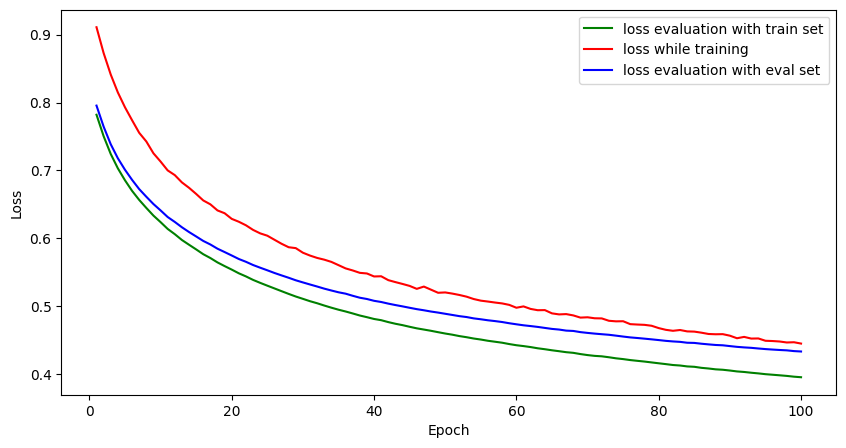

In [71]:
# Grafica de la pérdida
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss)+1),train_loss, color="green", label='loss evaluation with train set')
plt.plot(range(1, len(training_loss)+1),training_loss, color="red", label='loss while training')
plt.plot(range(1, len(eval_loss)+1),eval_loss, color="blue", label='loss evaluation with eval set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

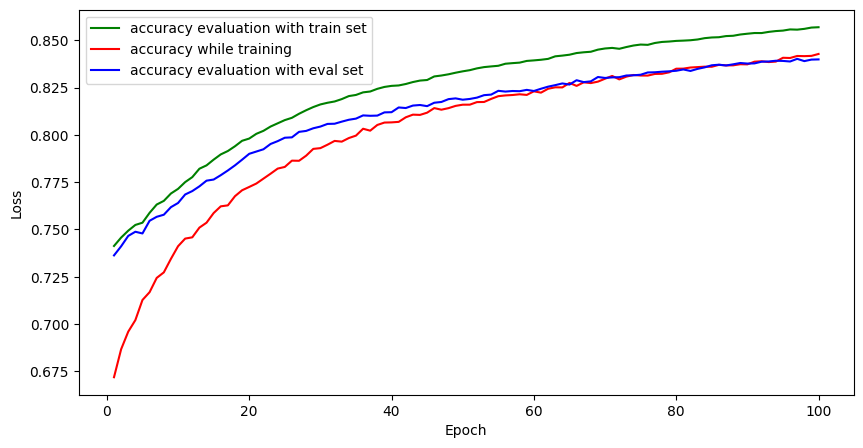

In [73]:
# Grafica de la pérdida
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracy)+1),train_accuracy, color="green", label='accuracy evaluation with train set')
plt.plot(range(1, len(training_accuracy)+1),training_accuracy, color="red", label='accuracy while training')
plt.plot(range(1, len(eval_accuracy)+1),eval_accuracy, color="blue", label='accuracy evaluation with eval set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

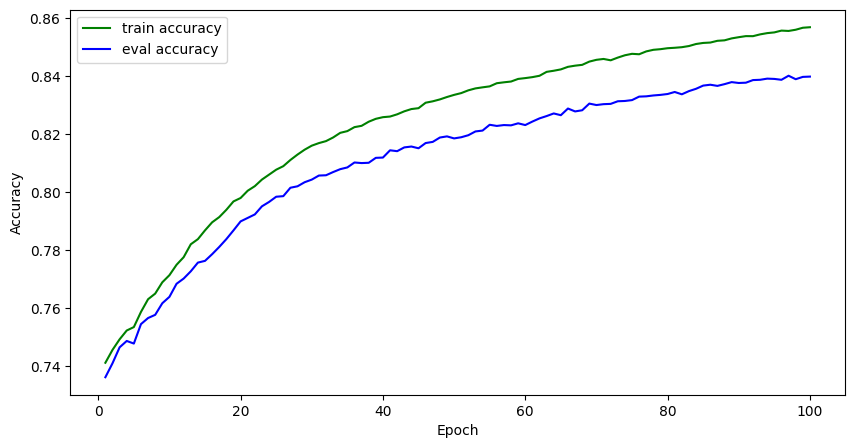

In [74]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracy)+1),train_accuracy, color="green", label='train accuracy')
plt.plot(range(1, len(eval_accuracy)+1),eval_accuracy, color="blue", label='eval accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**11)** Repita los experimentos variando hiperparámetros. Por ejemplo:

- El learning-rate.
- El optimizador (ej. puede usar ADAM).
- El valor de dropout.
- El número de neuronas en las capas intermedias.
- El número de épocas de entrenamiento.
- El tamaño de los lotes.

Discuta los resultados.

In [91]:
# torch.save({
            # 'modelJupiterace_state_dict': model.state_dict(),
            # 'optimizerA_state_dict': optimizer.state_dict(),
            # }, "models/models.pt")